# Problem Statement:  Compare F1-Scores and performance of 3 different clustering algorithms on Iris dataset.


**Submission by:  Praveen Kumar**

inbox.praveen.kumar17@gmail.com

AI Techology & Systems

www.ai-techsystems.com



### Importing Kaggle API & Downloading the IRIS dataset

In [0]:
from google.colab import files
import os
files.upload()
os.listdir()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
import kaggle
!kaggle datasets download -d ashishs0ni/iris-dataset
print("Downloaded Ashishs0ni/IRIS dataset successfully!")

Saving kaggle.json to kaggle.json
  0% 0.00/1.24k [00:00<?, ?B/s]
100% 1.24k/1.24k [00:00<00:00, 1.09MB/s]
Downloaded Ashishs0ni/IRIS dataset successfully!


In [0]:
!ls

iris-dataset.zip  kaggle.json  sample_data


### Extracting Dataset

In [0]:
import zipfile
import os
with zipfile.ZipFile('iris-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('iris_dataset')
    
os.unlink('iris-dataset.zip') ## deleting .zip file after extracting to save drive space

In [0]:
!ls

iris_dataset  kaggle.json  sample_data


### EDA:


<img src="https://www.aiche.org/sites/default/files/images/webinar/shutterstock357106388.jpg">

### Importing required libraries

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))

matplotlib: 3.0.3
seaborn: 0.9.0
pandas: 0.24.2
numpy: 1.16.4


### Reading data

In [0]:
data = pd.read_csv('iris_dataset/Iris.csv')

In [0]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
data.shape

(150, 6)

We have very less training examples

In [0]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Data visualization & Insights

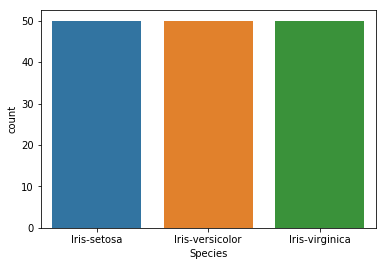

In [0]:
sns.countplot(data['Species'])

We have 3 classes and all of them have same number of class count, i.e. 50 each class samples

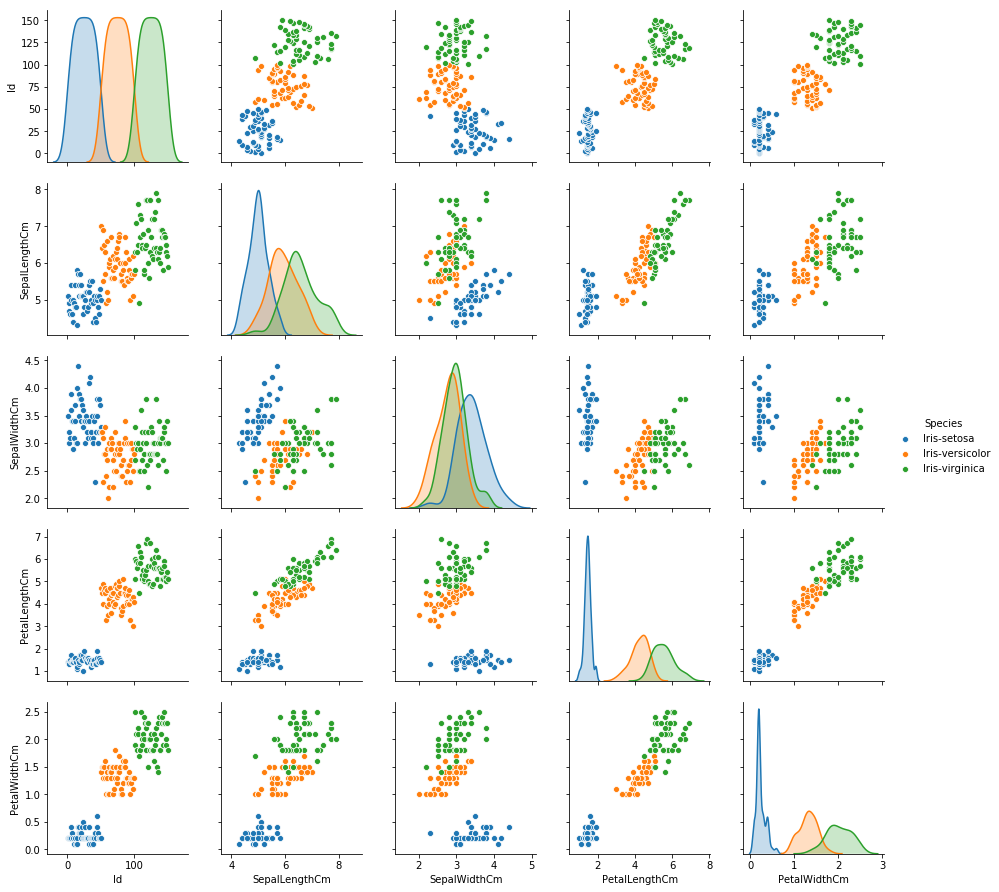

In [0]:
sns.pairplot(data,hue='Species')

Pairplot of the dataset gives us a idea of correlations between length & width of petals and sepals with respect to species.

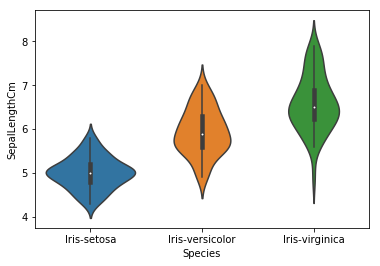

In [0]:
sns.violinplot(data=data,x='Species',y='SepalLengthCm')

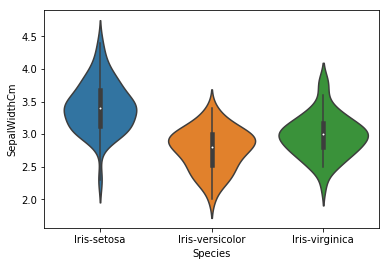

In [0]:
sns.violinplot(data=data,x='Species',y='SepalWidthCm')

From the above 2 graphs, we conclude that Species and Sepal are distributed differently based on their length and width. 

When SepalLength is considered, length increases based on class, whereas, when width is considered, the width decreases marginally.

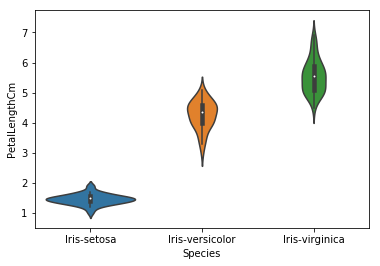

In [0]:
sns.violinplot(data=data,x='Species',y='PetalLengthCm')

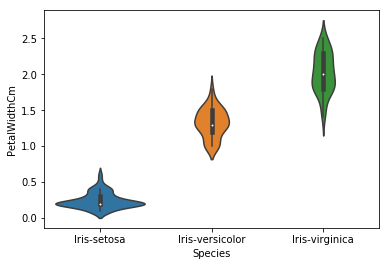

In [0]:
sns.violinplot(data=data,x='Species',y='PetalWidthCm')

From the above 2 graphs, we conclude that Species and Petal are distributed differently based on their length and width. 

When PetalLength is considered, length increases based on class, and same applies for PetalWidth.

### Feature engineering

<img src="https://miro.medium.com/max/1200/1*K6ctE0RZme0cqMtknrxq8A.png">

In [0]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
data.drop(['Id'],inplace=True,axis=1)

In [0]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
data['SepalArea'] = data['SepalLengthCm']*data['SepalWidthCm']
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalArea
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00


In [0]:
data['PetalArea'] = data['PetalLengthCm']*data['PetalWidthCm']
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalArea,PetalArea
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28


In [0]:
data['SepalAvg'] = (data['SepalLengthCm']+data['SepalWidthCm'])/2
data['PetalAvg'] = (data['PetalLengthCm']+data['PetalWidthCm'])/2

In [0]:
data['FlowerArea'] = data['SepalArea']*data['PetalArea']
data['AverageFlowerArea'] = data['SepalAvg']*data['PetalAvg']

In [0]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalArea,PetalArea,SepalAvg,PetalAvg,FlowerArea,AverageFlowerArea
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28,4.30,0.80,4.9980,3.4400
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28,3.95,0.80,4.1160,3.1600
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26,3.95,0.75,3.9104,2.9625
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30,3.85,0.85,4.2780,3.2725
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28,4.30,0.80,5.0400,3.4400


In [0]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'SepalArea', 'PetalArea', 'SepalAvg', 'PetalAvg',
       'FlowerArea', 'AverageFlowerArea'],
      dtype='object')

### Data Split

<img src="http://scott.fortmann-roe.com/docs/docs/MeasuringError/holdout.png">

In [0]:
import sklearn
from pandas import get_dummies
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
print('SkLearn: {}'.format(sklearn.__version__))

SkLearn: 0.21.3


In [0]:
features = data.drop(['Species'],axis=1)
target = data['Species']

In [0]:
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SepalArea,PetalArea,SepalAvg,PetalAvg,FlowerArea,AverageFlowerArea
0,5.1,3.5,1.4,0.2,17.85,0.28,4.30,0.80,4.9980,3.4400
1,4.9,3.0,1.4,0.2,14.70,0.28,3.95,0.80,4.1160,3.1600
2,4.7,3.2,1.3,0.2,15.04,0.26,3.95,0.75,3.9104,2.9625
3,4.6,3.1,1.5,0.2,14.26,0.30,3.85,0.85,4.2780,3.2725
4,5.0,3.6,1.4,0.2,18.00,0.28,4.30,0.80,5.0400,3.4400


In [0]:
target.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [0]:
X = features
class_dict = {'Iris-setosa':1,
             'Iris-versicolor':2,
             'Iris-virginica':3}
y = target.map(lambda x: class_dict[x])

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state=101)

### Clustering algortihms and model designing

1. K-Means

2. Gaussian Mixture model clustering

3. AffinityPropagation clustering

<img src="https://miro.medium.com/max/1838/1*E7sk9C5buY9KnBUDflI9fQ.png">

#### -> K-Means Clustering

In [0]:
from sklearn.cluster import KMeans

In [0]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

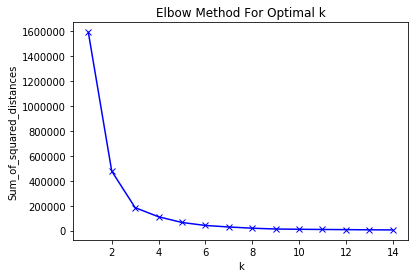

In [0]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**K=3 from elbow method**

In [0]:
nc = 3

In [0]:
km = KMeans(n_clusters=nc,n_init=15,tol=1e-02,precompute_distances=True)

In [0]:
km.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances=True,
       random_state=None, tol=0.01, verbose=0)

In [0]:
y_km_prd = km.predict(X_test)

In [0]:
print(confusion_matrix(y_km_prd,Y_test))

[[ 0 10  3  0]
 [ 0  0  0  3]
 [ 0  0 14  8]
 [ 0  0  0  0]]


In [0]:
print(classification_report(y_km_prd,Y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00         3
           2       0.82      0.64      0.72        22
           3       0.00      0.00      0.00         0

    accuracy                           0.37        38
   macro avg       0.21      0.16      0.18        38
weighted avg       0.48      0.37      0.42        38



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
print(accuracy_score(y_km_prd,Y_test))

0.3684210526315789


#### -> Gaussian mixture model clustering

In [0]:
from sklearn.mixture import GaussianMixture

In [0]:
gmm = GaussianMixture(n_components=3,covariance_type='spherical',tol=1e-02,reg_covar=1e-02,n_init=3,init_params='kmeans')

In [0]:
gmm.fit(X_train)

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=3, precisions_init=None,
                random_state=None, reg_covar=0.01, tol=0.01, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [0]:
y_cluster_gmm = gmm.predict(X_test)

In [0]:
print(confusion_matrix(y_cluster_gmm,Y_test))

[[ 0 10  0  0]
 [ 0  0  0  7]
 [ 0  0 17  4]
 [ 0  0  0  0]]


In [0]:
print(classification_report(y_cluster_gmm,Y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00         7
           2       1.00      0.81      0.89        21
           3       0.00      0.00      0.00         0

    accuracy                           0.45        38
   macro avg       0.25      0.20      0.22        38
weighted avg       0.55      0.45      0.49        38



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
print(accuracy_score(y_cluster_gmm,Y_test))

0.4473684210526316


#### -> AffinityPropagation Clustering

In [0]:
from sklearn.cluster import AffinityPropagation

In [0]:
ap = AffinityPropagation(damping = 0.5, max_iter = 300, affinity = 'euclidean')

In [0]:
ap.fit(X_train)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=300, preference=None, verbose=False)

In [0]:
y_pred_ap = ap.predict(X_test)

In [0]:
print(confusion_matrix(y_pred_ap,Y_test))

[[ 0 10  2  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  2  6  0  0]
 [ 0  0 13  1  0  0]]


In [0]:
print(classification_report(y_pred_ap,Y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.27      1.00      0.43         3
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        14

    accuracy                           0.08        38
   macro avg       0.05      0.17      0.07        38
weighted avg       0.02      0.08      0.03        38



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
print(accuracy_score(y_pred_ap,Y_test))

0.07894736842105263
